# Exploratory data analysis (EDA) of apartment data

## Libraries and settings

In [1]:
# Libraries
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime, timedelta

# seaborn graphics settings
sns.set_theme(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/python_exploratory_data_analysis


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [2]:
# Columns to read
columns = ['web-scraper-order',
            'address_raw',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'pop',
            'pop_dens',
            'emp',
            'frg_pct',
            'mean_taxable_income']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv")[columns]      # [columns] damit sagen wir, dass wir nur die definierten Spalten in unserem dataframe haben möchten

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df = df_orig.dropna()
df.head(5)


# Optionen für dropna():
#   df.dropna(axis=1): Löscht Spalten statt Zeilen, wenn mindestens eine Zelle in der Spalte NaN ist.
#   df.dropna(how='all'): Löscht nur Zeilen, in denen alle Zellen NaN sind.
#   df.dropna(subset=['Spalte1', 'Spalte2']): Löscht nur Zeilen, in denen NaN in den angegebenen Spalten enthalten ist.
#   df.dropna(thresh=n): Beibehaltung von Zeilen, die mindestens n Nicht-NaN-Werte enthalten.

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles

In [3]:
# Calculate quantiles
df[['price', 'rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(
    q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1356.50,1.0,26.00,18.65,340.27
0.10,1500.00,1.5,43.00,20.36,525.66
0.25,1849.25,2.5,63.25,23.39,1044.63
0.50,2390.00,3.5,86.00,27.95,1662.60
0.75,3027.50,4.5,108.00,38.00,4778.99
0.90,3964.00,4.5,140.00,51.61,4778.99
0.95,4970.50,5.5,160.00,64.00,4778.99


### Shape (number of rows and colums)

In [4]:
# Number of rows and columns
print(df.shape)

(774, 16)


### Data types

In [5]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [6]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,47.407658,8.600456,186.255814,3.417959,88.899225,0.011628,2652.958656,32.857817,159277.266150,2489.306724,174995.766150,27.791852,80502.925758
std,0.085577,0.117768,81.548986,1.282049,39.508987,0.107273,1281.909438,14.886219,185867.397397,1741.332294,222830.654294,7.566620,14401.535269
min,47.195290,8.367652,1.000000,1.000000,8.000000,0.000000,86.000000,10.750000,698.000000,87.959866,129.000000,7.547170,62000.541872
25%,47.361180,8.517483,121.000000,2.500000,63.250000,0.000000,1849.250000,23.390000,8775.000000,1044.628957,3460.000000,24.535004,70988.017354
50%,47.396210,8.563061,230.000000,3.500000,86.000000,0.000000,2390.000000,27.950000,27746.000000,1662.597326,19226.000000,28.043732,80595.528256
75%,47.481299,8.711050,261.000000,4.500000,108.000000,0.000000,3027.500000,38.005000,420217.000000,4778.994655,491193.000000,32.458468,82932.737704
max,47.693893,8.915933,298.000000,8.500000,282.000000,1.000000,9950.000000,100.000000,420217.000000,4778.994655,491193.000000,46.226483,174434.537050


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [8]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),                 # round(, 1) rundet das Ergebnis auf 1 Dezimalstelle
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 774 Min: 86.0 Max: 9950.0 Mean: 2653.0 Median: 2390.0 Std: 1281.9
Area: Count: 774 Min: 8.0 Max: 282.0 Mean: 88.9 Median: 86.0 Std: 39.5


### Skewness

In [9]:
# .skew() berechnet die Schiefe der Verteilung. negativ: linksschief, 0: Verteilung symmetrisch, positiv: rechtsschief

df[['price','rooms', 'area']].skew()

price    2.182259
rooms    0.194969
area     0.888217
dtype: float64

### Kurtosis

In [10]:
# Kurtosis = Wölbung  -> wie schmal- oder breitgipflig Verteilung ist   -> >3 ;leptokurtisch; schmale Gipfel und fette Schwänze  |   =3 ; mesokurtisch ; ähnlich einer Normalverteilung   |   <3 ; platykurtisch;  flache Gipfel und dünne Schwänze

df[['price','rooms', 'area']].kurtosis()

price    6.933243
rooms    0.146377
area     1.963584
dtype: float64

### Extreme values

In [11]:
# Low costs apartments
df[df['price_per_m2'] <= 10]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income


In [12]:
# Very expansive apartments
df[df['price_per_m2'] >= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
150,1693998305-585,"Steinstrasse 35, 8003 Zürich, ZH",47.366997,8.520324,261,Zürich,1.0,15.0,0,1500.0,100.0,420217,4778.994655,491193.0,32.458468,82932.737704


### Get a list of categories of categorical variable

In [13]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Adliswil', 'Aeugst am Albis', 'Affoltern am Albis', 'Altikon',
       'Andelfingen', 'Bachenbülach', 'Bassersdorf', 'Bauma',
       'Bonstetten', 'Brütten', 'Bülach', 'Dielsdorf', 'Dietikon',
       'Dietlikon', 'Dättlikon', 'Dübendorf', 'Dürnten', 'Egg', 'Eglisau',
       'Elsau', 'Embrach', 'Fehraltorf', 'Feuerthalen',
       'Freienstein-Teufen', 'Fällanden', 'Glattfelden', 'Gossau (ZH)',
       'Greifensee', 'Hausen am Albis', 'Hedingen', 'Herrliberg',
       'Hettlingen', 'Hinwil', 'Hittnau', 'Hochfelden', 'Hombrechtikon',
       'Höri', 'Hüttikon', 'Kloten', 'Knonau', 'Küsnacht (ZH)',
       'Langnau am Albis', 'Laufen-Uhwiesen', 'Lindau', 'Lufingen',
       'Maur', 'Meilen', 'Mettmenstetten', 'Männedorf', 'Mönchaltorf',
       'Neerach', 'Neftenbach', 'Niederglatt', 'Niederhasli',
       'Niederweningen', 'Nürensdorf', 'Oberengstringen', 'Oberglatt',
       'Obfelden', 'Oetwil am See', 'Oetwil an der Limmat', 'Opfikon',
       'Ossingen', 'Pfungen', 'Pfäffikon', 'Regensd

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [15]:
pd.crosstab(df['luxurious'], df['rooms'])           # erstellt Kreuztabelle für die Häufigkeitsverteilung: Zeile: luxus , Spalte: rooms 

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.5
luxurious,,,,,,,,,,,,,,,
0,50,33,38,135,44,200,28,163,3,52,2,11,2,3,1
1,0,0,0,6,0,3,0,0,0,0,0,0,0,0,0


### Pivot tables

In [16]:
# Using pivot_table to reshape the data and calculate means
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0            50   32.920000    50  1306.220000           50  47.140400
1.5   0            33   35.969697    33  1963.515152           33  59.417576
2.0   0            38   55.184211    38  2120.078947           38  40.757105
2.5   0           135   66.800000   135  2382.755556          135  37.010000
      1             6   72.166667     6  3339.500000            6  45.978333
3.0   0            44   68.159091    44  1964.022727           44  28.677955
3.5   0           200   89.770000   200  2648.980000          200  29.494700
      1             3  101.666667     3  6036.666667            3  59.826667
4.0   0            28   98.464286    28  2852.357143           28  29.646429
4.5   0           163  114.926380   163  3086.570552          163  26.493436
5.0   0             3  108.000000     3  2881.666667            3  26.376667
5.5   0            52  153.250000    52  3590.653846           52  23.587500
6.0   0             2  185.000000     2  3800.000000            2  22.365000
6.5   0            11  167.363636    11  4114.272727           11  24.638182
7.0   0             2  175.000000     2  6350.000000            2  36.325000
7.5   0             3  205.000000     3  4765.000000            3  23.273333
8.5   0             1  210.000000     1  8500.000000            1  40.480000

### Correlation matrix

In [20]:
# gibt an, wie stark zwei Variablen linear zusammenhängen, mit Werten zwischen -1 (perfekte negative Korrelation) und 1 (perfekte positive Korrelation)
# 0 bedeutet keine Korrelation

corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.837164,0.470852,-0.473667,-0.314237,-0.271542
area,0.837164,1.000000,0.612040,-0.456373,-0.262732,-0.259325
price,0.470852,0.612040,1.000000,0.287203,0.288451,0.090471
price_per_m2,-0.473667,-0.456373,0.287203,1.000000,0.619558,0.351672
pop_dens,-0.314237,-0.262732,0.288451,0.619558,1.000000,0.655017
frg_pct,-0.271542,-0.259325,0.090471,0.351672,0.655017,1.000000


### Covariance matrix

In [19]:
# Zeigt, wie zwei Variablen gemeinsam variieren. positive cov -> Variabeln steigen gemeinsam  ; negative cov -> eine Variable steigt und die andere fällt 

cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.643649,42.404399,7.738317e+02,-9.039862,-7.015247e+02,-2.634166
area,42.404399,1560.960077,3.099798e+04,-268.411152,-1.807547e+04,-77.525117
price,773.831662,30997.977717,1.643292e+06,5480.634631,6.438886e+05,877.541024
price_per_m2,-9.039862,-268.411152,5.480635e+03,221.599518,1.606008e+04,39.611806
pop_dens,-701.524676,-18075.474981,6.438886e+05,16060.083639,3.032238e+06,8630.505180
frg_pct,-2.634166,-77.525117,8.775410e+02,39.611806,8.630505e+03,57.253741


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

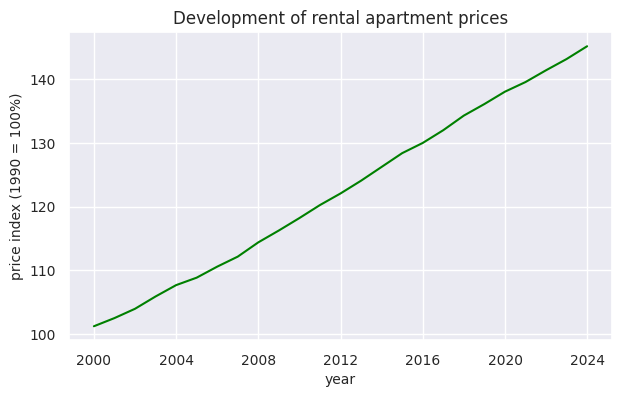

In [21]:
# Generate time series data for rental apartment prices over the last 20 years with an increasing trend
x = []
y = []

# Start from 25 years ago with an initial price
start_date_trend = datetime(2000, 1, 1)
initial_price = 100

for i in range(25):
    date = start_date_trend + timedelta(days=365 * i)
    price_increase_factor = 1 + random.uniform(0.01, 0.02)
    initial_price *= price_increase_factor
    x.append(date)
    y.append(round(initial_price, 2))

# Create a DataFrame to display the data
rental_prices_trend_df = pd.DataFrame({
    "Year": x,
    "Rental Price (USD)": y
})


# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

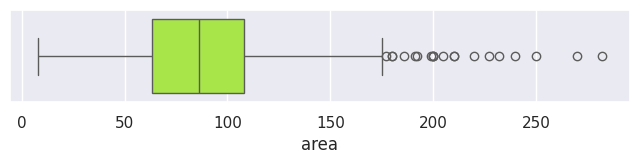

In [ ]:
plt.figure(figsize=(8,1.2))                 # Grösse von 8-Einheiten Breite, 1.2 Einheiten Höhe 
plt.ticklabel_format(style='plain')         # 
sns.boxplot(x=df['area'], color="greenyellow")

### Histogram  (matplotlib)

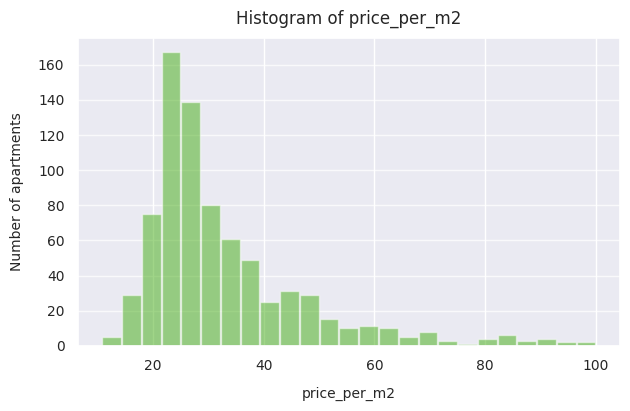

In [ ]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)     # legt die Schriftgrässe der X-Achsenbeschriftung fest und verhindert, dass die Beschriftung gedreht wird
plt.yticks(fontsize=14, rotation=0)     # legt die Schriftgrässe der Y-Achsenbeschriftung fest und verhindert, dass die Beschriftung gedreht wird

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5,      # legt die Transparenz der Balken fest (0= transparent, 1= undurchsichtig)
                            rwidth=0.95     # stellt die relative Breite der Balken ein (0=keine Breite, 1=maximaler Abstand zwischen Balken)
                   )
plt.grid(True)                              # aktiviert das Gitter im Diagramm
plt.ticklabel_format(style='plain')         # sorgt, dass Achsenbeschriftungen in normalem Zahlenformat(kein wissenschaftliches Format) angezeigt werden
plt.grid(axis='y', alpha=0.75)              # zeigt Gitter nur auf der Y-Achse mit 75% Transparenz an

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)            # labelpad fügt Abstand zwischen der Beschriftung und der Achse hinzu.
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)                   # legt die Schriftgrösse der Achsenbeschriftungen fest.
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

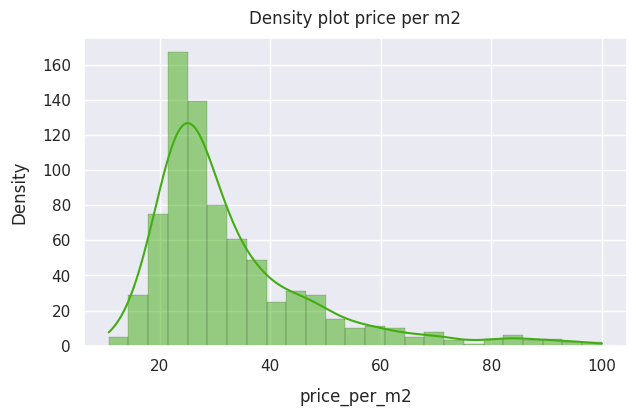

In [42]:
plt.figure(figsize=(7,4))
sns.histplot(df['price_per_m2'], 
             bins=25, 
             color='#42AD12',
             alpha=0.5,
             kde=True, 
             edgecolor='black', 
             linewidth=0.1)

plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      area       var
671    8.0 -2.047616
183   14.0 -1.895752
422   15.0 -1.870441
150   15.0 -1.870441
49    15.0 -1.870441
..     ...       ...
393  232.0  3.621980
283  240.0  3.824466
197  250.0  4.077573
675  270.0  4.583787
436  282.0  4.887515

[774 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

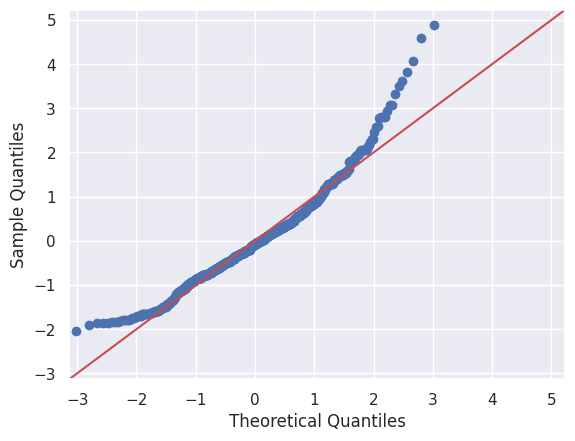

In [ ]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')     # line stellt eine Linie dar mit 45° Steigung
plt.show


# wenn die Punkte sich nicht auf der Linie befindet, heisst das, dass die Daten nicht einer Normalverteilung folgen.
# die extremen Abweichungen an den Enden weisen auf das Vorhandensein von Ausreissern oder abweichende Verteilung (z.B fette Schwänze) 

### Barchart  (matplotlib)

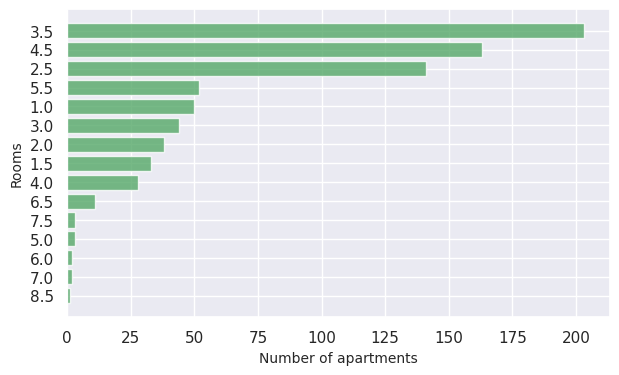

In [45]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)    # nlargest(15): wählt die 15 häufigsten Zimmeranzahlen aus

# Values for barchart
napart = list(df_bar.values)            # Liste der Häufigkeiten, die die Anzahl der Wohnungen mit einer bestimmen Zimmeranzahl darstellen
index = list(df_bar.index.values)       # Y-Achse: Liste der Zimmeranzahlen
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

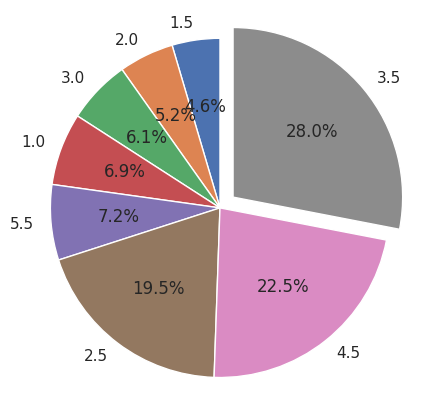

In [50]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

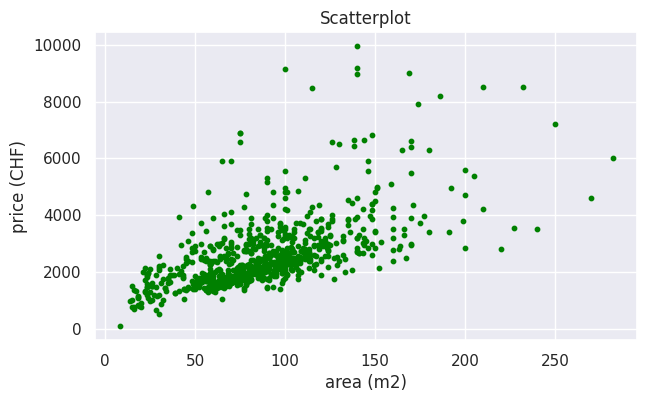

In [64]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'],         # X-Achse
           df['price'],         # Y-Achse
           color="green", 
           alpha=1,             # Transparenz der Puntke (0 bis 1)
           s=10)                # grösse der Punkte
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(760, 17)
19.406299563782138
938.0487789412097


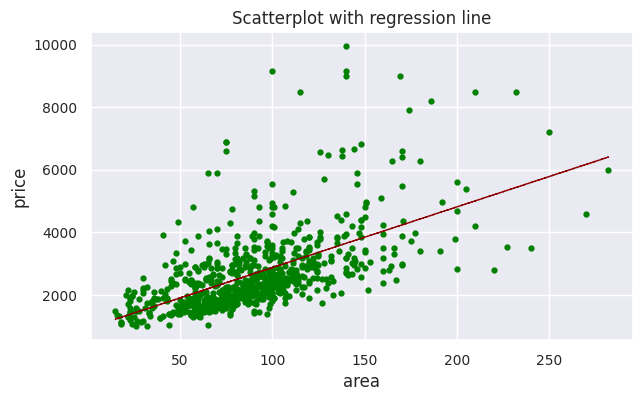

In [ ]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

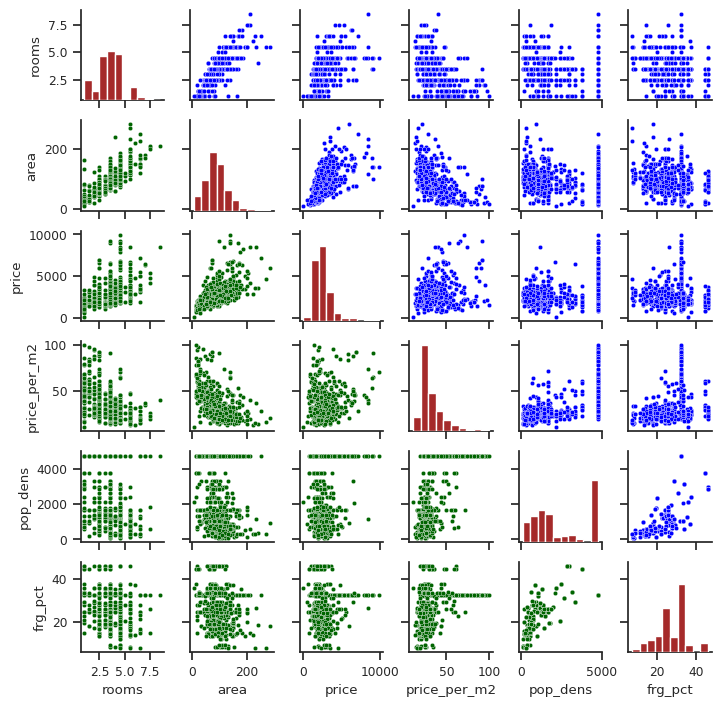

In [69]:
sns.set_theme(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='blue', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(743, 17)


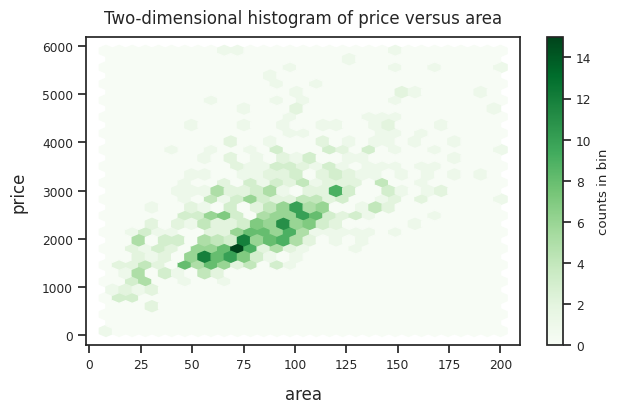

In [70]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

              rooms  area  price  price_per_m2  pop_dens  frg_pct
rooms          1.00  0.84   0.47         -0.47     -0.31    -0.27
area           0.84  1.00   0.61         -0.46     -0.26    -0.26
price          0.47  0.61   1.00          0.29      0.29     0.09
price_per_m2  -0.47 -0.46   0.29          1.00      0.62     0.35
pop_dens      -0.31 -0.26   0.29          0.62      1.00     0.66
frg_pct       -0.27 -0.26   0.09          0.35      0.66     1.00


<Axes: >

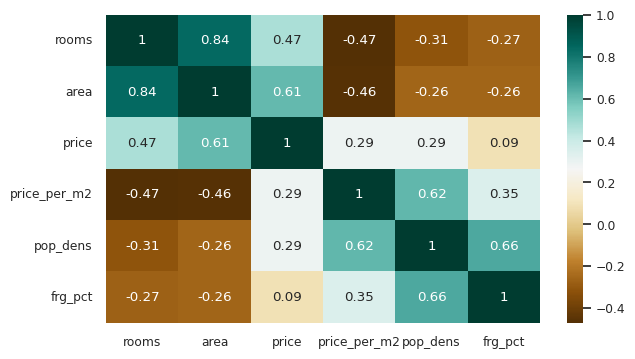

In [71]:
# Set font size for plot
sns.set_theme(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
corr = df[['rooms', 
            'area', 
            'price', 
            'price_per_m2',
            'pop_dens',
            'frg_pct']].corr().round(2)
print(corr)

# Plot heatmap
plt.figure(figsize=(7,4))
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

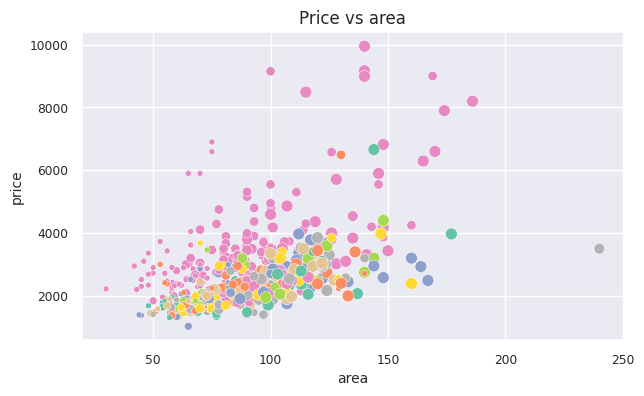

In [81]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)    # erstellt eine Farbpalette

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms",      # rooms bestimmt die Grösse der Punkte/bubbles -> grössere Punkte = Wohnungen mit mehr Zimmer
                     hue="pop_dens",    # Bestimmt die Farbe der Punkte basierend auf der Bevölkerugnscichte
                     palette="Set2",    # Farbpalette für die Färbund der Punkte
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')